<a href="https://colab.research.google.com/github/kondreddyvarshini/ML_Project/blob/main/ML_Codealpha_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**************Random Forest Evaluation**************
Accuracy: 1.00

Confusion Matrix:
 [[ 30   0]
 [  0 170]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00       170

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



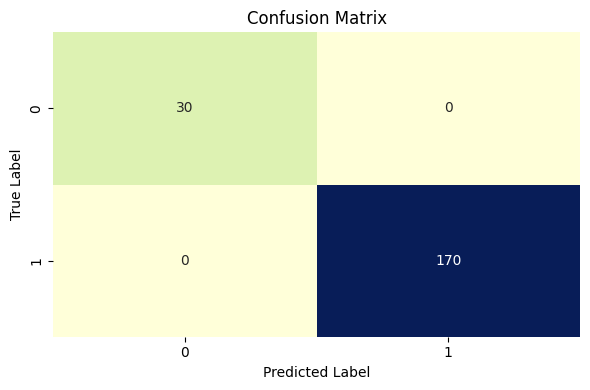

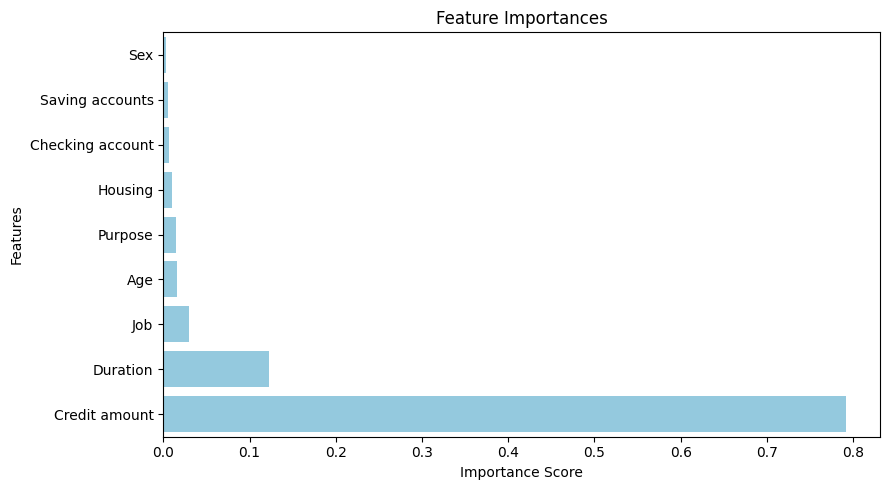

In [1]:
# Credit Scoring Model (TASK-1)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/german_credit_data.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df["Saving accounts"] = df["Saving accounts"].fillna("no_info")
df["Checking account"] = df["Checking account"].fillna("no_info")
le = LabelEncoder()
categorical_features = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
df[categorical_features] = df[categorical_features].apply(le.fit_transform)
df["Risk"] = df["Credit amount"].apply(lambda amount: "good" if amount <= 5000 else "bad")
df["Risk"] = le.fit_transform(df["Risk"])
X = df.drop("Risk", axis=1)
y = df["Risk"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)
print("\n**************Random Forest Evaluation**************")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values()
plt.figure(figsize=(9,5))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index, color="skyblue")
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()